<a href="https://colab.research.google.com/github/Su-daa/sudaa_p/blob/main/%EA%B0%95%EC%9D%98%EC%9E%90%EB%A3%8C_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
arr = np.arange(1,10).reshape(3,3)
print("arr",arr,sep='\n')
print(arr[:,:-1]) #맨 마지막 열 빼고 출력
print(arr[:,-1]) #맨 마지막 열 출력
print(arr[1,:]) #두번째 행

arr
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2]
 [4 5]
 [7 8]]
[3 6 9]
[4 5 6]


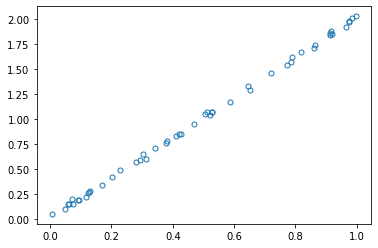

In [ ]:
#텐서플로로 선형회귀

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tfl=tf.keras.layers #여기까지는 기본으로 항상 쓰기

rng=np.random
X=rng.rand(50).reshape(-1,1)#가상데이터
Y=2*X+0.02+0.02*rng.randn(50,1)

plt.plot(X,Y,'o',ms=5,mfc='none')#그래프로 나타내기 mfc:마커 내부 색깔

In [ ]:
#선형모델 만들기
model = tf.keras.Sequential() #모델을 만들 준비를 한다.
model.add(tfl.Dense(1,input_shape=(1,))) #모델에 신경망 추가.
model2=tf.keras.Sequential()
model2.add(tfl.Dense(3,)) #add를 통해서 Sequential 에 추가

In [ ]:
model.weights #kernel=weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-1.0173697]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [ ]:
opt=tf.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=opt,loss='mse',metrics=['accuracy'])
#optimizer=SGD,Adam//loss='mse','binary_crossentropy','categorical_crossentropy'//metric=['accuracy']
model.summary() # 모델 요약. input_shape이 있어야 훈련전에 확인가능

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


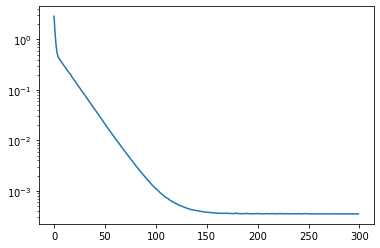

In [ ]:
history=model.fit(X,Y,epochs=300,verbose=0)
plt.semilogy(history.history['loss'])# 훈련과정을 볼 수 있게한다.

**!!!은닉층 추가하는 법!!!**

---



---



많이 사용하니까 고냥 외우자 밑에꺼!


In [ ]:
#레이블 형태 예측 어려울때 -> 비선형 함수를 자동으로 찾으려면?
#은닉층 추가
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tfl=tf.keras.layers #여기까지는 기본으로 항상 쓰기

rng=np.random

X=np.arange(0,1,0.02).reshape(-1,1)
Y=10*X*(X-0.7)**2-0.5*np.sqrt(X)+0.015*rng.randn(50,1)


**모델링(Modeling)**

Sequential(): 층을 구성하기 위해서 쓰는것
위의 것을 model로 선언한 뒤에 model.add()를 이용해서 층을 단계적으로 추가.

Dense: 전 결합층을 추가


model.add(Dense(출력 뉴런의 수, input_dim=입력의 차원,activation='활성화 함수'))


활성화함수:linear,sigmoid(이진분류에서 출력층에 주로 사용),softmax(셋 이상의 선택지 중 하나를 택하는 다중 클래스 분류 문제에서 출력층에 주로 사용),relu(은닉층에 주로 사용되는 활성화 함수)

**컴파일과 훈련**


model.compile(optimizer='훈련과정 설정하는 옵티마이저',loss='loss함수',metrics=['모니터링하기 위한 지표'])

loss 함수 종류: mean_squared_error(회귀문제)/categorical_crossentropy(다중클래스 분류-softmax)/sparse_categorical_crossentropy(다중클래스 분류-softmax)/binary_crossentropy(이진 분류-sigmoid)

model.fit(훈련데이터,학습 레이블 데이터,epochs=n(훈련횟수),verbose=n(0,1,2중, 학습 중 출력되는 문구))

model.evaluate(테스트 데이터, 학습 레이블 테스트 데이터)

-->model(Sequential),add,complie,history(fit),evaluate

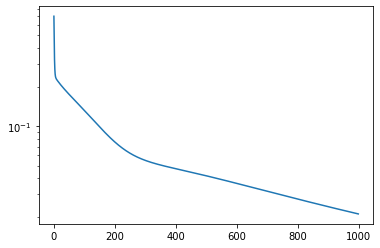

In [ ]:
model=tf.keras.Sequential()
model.add(tfl.Dense(3,activation='sigmoid'))
model.add(tfl.Dense(1))
opt=tf.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=opt,loss='mse',metrics=['accuracy'])
history=model.fit(X,Y,epochs=1000,verbose=0)
plt.semilogy(history.history['loss'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


**이진분류**

tensorflow로 해보기

In [ ]:
import numpy as np
rng=np.random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
lossf='binary_crossentropy'
opt=tf.optimizers.SGD(learning_rate=0.01)

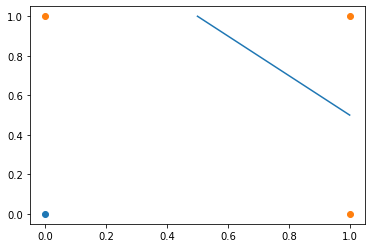

In [ ]:
X=np.array([[0,0],[0,1],[1,0],[1,1]],np.float32)
Yr=np.array([0,1,1,1],np.float32)
Y=Yr.reshape(-1,1)
plt.scatter(X[Yr==0,0],X[Yr==0,1])
plt.scatter(X[Yr==1,0],X[Yr==1,1])
plt.plot([0.5,1],[1,0.5])

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
opt=tf.optimizers.SGD(learning_rate=0.01)
lossf='binary_crossentropy'
model.compile(optimizer=opt,loss=lossf,metrics=['accuracy'])
history=model.fit(X,Y,epochs=2000,verbose=0)
model.evaluate(X,Y,verbose=0)

[0.29103755950927734, 0.75]

xor type

In [ ]:
#차원 확장 : 고차원에서 하나의 평면으로 분리
XH=np.append(X,(X[:,0]*X[:,1]).reshape(-1,1),axis=-1)

In [ ]:
lossf='binary_crossentropy'
opt=tf.optimizers.SGD(learning_rate=0.01)

model=tf.keras.Sequential()
model.add(tfl.Dense(1,activation='sigmoid'))
model.compile(optimizer=opt,loss=lossf,metrics=['accuracy'])
history=model.fit(XH,Y,epochs=3000,verbose=0)
model.evaluate(XH,Y)

1/1 [==============================] - 0s 126ms/step - loss: 0.1935 - accuracy: 1.0000


[0.19347533583641052, 1.0]

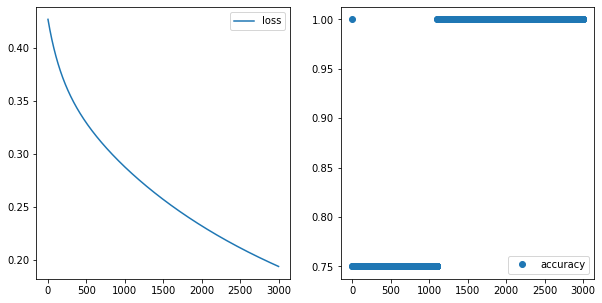

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label="loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'o',label="accuracy")
plt.legend()
plt.show()

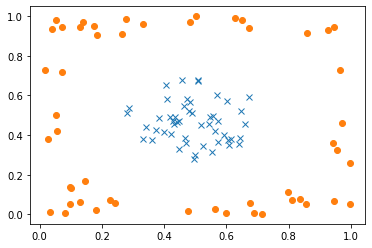

In [ ]:
#은닉층 추가 ->model.add여러개
X1=rng.uniform(0,1,(1000,2))
Y=(X1[:,0]-0.5)**2 + (X1[:,1]-0.5)**2<0.05
T1=X1[Y][:50,:]
Y=(X1[:,0]-0.5)**2 + (X1[:,1]-0.5)**2>0.2
T2=X1[Y][:50,:]
T1=np.pad(T1,((0,0),(0,1)),constant_values=1)
T2=np.pad(T2,((0,0),(0,1)),constant_values=0)
plt.plot(T1[:,0],T1[:,1],'x',T2[:,0],T2[:,1],'o')

In [ ]:
tr=np.concatenate((T1,T2))
trX,trY=tr[:,:-1],tr[:,-1:]
Yr=trY.astype(int).ravel()
print(trX,trY)

In [ ]:
model=tf.keras.Sequential()
model.add(tfl.Dense(5,activation='sigmoid'))
model.add(tfl.Dense(1,activation='sigmoid'))
opt=tf.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(trX,trY,epochs=5000,verbose=0)
model.evaluate(trX,trY)

4/4 [==============================] - 0s 3ms/step - loss: 4.3894e-06 - accuracy: 1.0000


[4.389426976558752e-06, 1.0]

**소프트맥스 분류**

분류할 항목 여러개

model.add의 activation을 softmax로

optimizer=>opt=tf.optimizers.Adam으로 사용


loss함수=>lossf='categorical_crossentropy' 사용

In [ ]:
tr=np.loadtxt('softex.csv',delimiter=',')
model=tf.keras.Sequential()
model.add(tfl.Dense(3,activation='softmax'))
opt=tf.optimizers.Adam(learning_rate=0.1)
lossf='categorical_crossentropy'
model.compile(optimizer=opt,loss=lossf,metrics=['accuracy'])
history=model.fit(trX,trY,epochs=1000,verbose=0)
model.evaluate(trX,trY)

## 꼭꼭 시험전에 외우고 들어가야할 코드!

In [ ]:
#csv파일 이용해서 softmax쓰는거
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
rng=np.random
tfl=tf.keras.layers

tr=np.loadtxt('softex.csv',delimiter=',')
X=tr[:,:-1]
Y=tr[:,-1]#마지막 열

model=tf.keras.Sequential()
model.add(tfl.Dense(3,activation='softmax'))
opt=tf.optimizers.Adam(0.01)
lossf='sparse_categorical_crossentropy'
model.compile(optimizer=opt,
              loss=lossf,
              metrics=['accuracy'])
history=model.fit(X,Y,epochs=1000,verbose=0)
score=model.evaluate(X,Y,verbose=0)
print(score)

In [ ]:
#이진분류에서 numpy 구현
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
rng=np.random
mycolor=['green','blue','red','orange','yellow']

def sig(X):
  return 1./(1.+np.exp(-X))
def loss(W,b,X,Y):
  Yhat=np.matmul(X,W)+b
  P=sig(Yhat)
  entropy=-Y*np.log(P)-(1-Y)*np.log(1-P)
  return np.mean(entropy)
def grad_desc(W,b,alpha,X,Y,batch_size):
  Yhat=np.matmul(X,W)+b
  diff=sig(Yhat)-Y
  W-=alpha*np.matmul(X.T,diff)/batch_size
  b-=alpha*np.mean(diff)
  return W,b
def accuracy(Y,Yhat):
  diff=(Yhat>0)-Y
  return 1.-np.mean(diff**2)

X=np.array([[0,0],[0,1],[1,0],[1,1]],dtype=np.float32)
Y=np.array([[0],[1],[1],[1]])

W=rng.randn(2,1)
b=rng.randn()
alpha=0.1
batch_size=X.shape[0]

for i in range(1,1001):
  W,b=grad_desc(W,b,alpha,X,Y,batch_size)
  if i%100==0:
    Yhat=np.matmul(X,W)+b
    print(W,b,accuracy(Y,Yhat))

[[0.3587255 ]
 [1.27225416]] 0.7717208799087668 0.75
[[1.08118581]
 [1.72593548]] 0.24057616083856298 0.75
[[1.65716457]
 [2.12045445]] -0.1491018050371156 1.0
[[2.12875964]
 [2.46989806]] -0.4423632805997252 1.0
[[2.5240305]
 [2.7818199]] -0.674377593753137 1.0
[[2.86245657]
 [3.0620876 ]] -0.8657800887592146 1.0
[[3.15749082]
 [3.31552365]] -1.0286553750082472 1.0
[[3.41855697]
 [3.54610928]] -1.1704492113345193 1.0
[[3.65241413]
 [3.7571271 ]] -1.2960188266766826 1.0
[[3.8640356 ]
 [3.95128465]] -1.4086993411972313 1.0


In [ ]:
import numpy as np
A=np.linspace(0,1)
print(A,sep='\n')

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


In [ ]:
a=np.arange(12).reshape(-1,3)
print(a)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


# 기말고사


기말 범위 실습(10.31)

In [ ]:
#tf7
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng=np.random
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [ ]:
(x_tr0,y_train),(x_te0,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_tr0.shape #60000개의 샘플-> 3차원으로 바꿔줘야한다

(60000, 28, 28)

In [ ]:
x_train=x_tr0.reshape(-1,28,28,1)/255
x_test=x_te0.reshape(-1,28,28,1)/255

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
ks=3
lossf='sparse_categorical_crossentropy'

In [ ]:
model=tf.keras.Sequential()
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64,ks,padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model=tf.keras.Sequential([Conv2D(32,3,padding='same',activation='relu'),
                           MaxPool2D(),
                           Conv2D(64,ks,padding='same',activation='relu'),
                           MaxPool2D(),
                           Flatten(),
                           Dense(128,activation='relu'),
                           Dense(10,activation='softmax')])


In [ ]:
model.compile(loss=lossf,optimizer='Adam',metrics=['accuracy'])

In [ ]:
hist=model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 66s 87ms/step - loss: 0.1658 - accuracy: 0.9500 - val_loss: 0.0882 - val_accuracy: 0.9728
Epoch 2/10
750/750 [==============================] - 67s 90ms/step - loss: 0.0491 - accuracy: 0.9850 - val_loss: 0.0457 - val_accuracy: 0.9868
Epoch 3/10
750/750 [==============================] - 64s 85ms/step - loss: 0.0333 - accuracy: 0.9899 - val_loss: 0.0414 - val_accuracy: 0.9879
Epoch 4/10
750/750 [==============================] - 65s 87ms/step - loss: 0.0246 - accuracy: 0.9919 - val_loss: 0.0372 - val_accuracy: 0.9888
Epoch 5/10
750/750 [==============================] - 64s 85ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0398 - val_accuracy: 0.9884
Epoch 6/10
750/750 [==============================] - 67s 90ms/step - loss: 0.0140 - accuracy: 0.9951 - val_loss: 0.0381 - val_accuracy: 0.9899
Epoch 7/10
750/750 [==============================] - 67s 89ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0361 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model2=tf.keras.Sequential([
    Flatten(),
    Dense(1280,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model2.compile(loss=lossf,optimizer='adam',metrics=['accuracy'])
hist=model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
938/938 [==============================] - 76s 81ms/step - loss: 0.0143 - accuracy: 0.9961 - val_loss: 0.0342 - val_accuracy: 0.9902
Epoch 2/10
938/938 [==============================] - 79s 84ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.0311 - val_accuracy: 0.9913
Epoch 3/10
938/938 [==============================] - 76s 81ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0324 - val_accuracy: 0.9915
Epoch 4/10
938/938 [==============================] - 76s 81ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0326 - val_accuracy: 0.9913
Epoch 5/10
938/938 [==============================] - 79s 84ms/step - loss: 0.0053 - accuracy: 0.9981 - val_loss: 0.0395 - val_accuracy: 0.9899
Epoch 6/10
938/938 [==============================] - 76s 81ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0375 - val_accuracy: 0.9921
Epoch 7/10
938/938 [==============================] - 76s 81ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0333 - val_accuracy:

In [ ]:
(x_tr0,y_train),(x_te0,y_test)=tf.keras.datasets.cifar10.load_data()

In [ ]:
x_train=x_tr0/255
x_test=x_te0/255

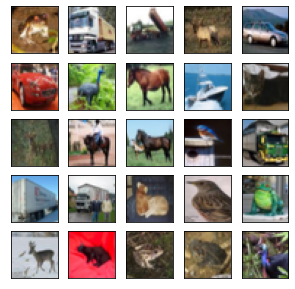

In [ ]:
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_tr0[i])
  plt.xticks([])
  plt.yticks([])

In [ ]:
model=tf.keras.Sequential()
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64,ks,padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model=tf.keras.Sequential([
    Flatten(),
    Dense(1280,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(loss=lossf,optimizer='adam',metrics=['accuracy'])
hist=model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
782/782 [==============================] - 34s 43ms/step - loss: 2.0576 - accuracy: 0.2465 - val_loss: 1.9232 - val_accuracy: 0.2783
Epoch 2/10
782/782 [==============================] - 32s 41ms/step - loss: 1.8452 - accuracy: 0.3206 - val_loss: 1.7802 - val_accuracy: 0.3514
Epoch 3/10
782/782 [==============================] - 32s 41ms/step - loss: 1.7167 - accuracy: 0.3766 - val_loss: 1.6471 - val_accuracy: 0.4044
Epoch 4/10
782/782 [==============================] - 33s 42ms/step - loss: 1.6224 - accuracy: 0.4178 - val_loss: 1.6169 - val_accuracy: 0.4179
Epoch 5/10
782/782 [==============================] - 37s 47ms/step - loss: 1.5675 - accuracy: 0.4384 - val_loss: 1.5430 - val_accuracy: 0.4496
Epoch 6/10
782/782 [==============================] - 32s 41ms/step - loss: 1.5258 - accuracy: 0.4573 - val_loss: 1.5221 - val_accuracy: 0.4562
Epoch 7/10
782/782 [==============================] - 33s 42ms/step - loss: 1.4877 - accuracy: 0.4677 - val_loss: 1.5016 - val_accuracy:

In [ ]:
model=tf.keras.Sequential()
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64,ks,padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64,ks,padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(1280,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss=lossf,optimizer='adam',metrics=['accuracy'])
hist=model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
782/782 [==============================] - 162s 207ms/step - loss: 1.4141 - accuracy: 0.4858 - val_loss: 1.2094 - val_accuracy: 0.5773
Epoch 2/10
782/782 [==============================] - 159s 204ms/step - loss: 0.9666 - accuracy: 0.6574 - val_loss: 0.8895 - val_accuracy: 0.6859
Epoch 3/10
782/782 [==============================] - 162s 207ms/step - loss: 0.7551 - accuracy: 0.7336 - val_loss: 0.8098 - val_accuracy: 0.7222
Epoch 4/10
782/782 [==============================] - 161s 206ms/step - loss: 0.5767 - accuracy: 0.7985 - val_loss: 0.8086 - val_accuracy: 0.7279
Epoch 5/10
782/782 [==============================] - 163s 208ms/step - loss: 0.4083 - accuracy: 0.8560 - val_loss: 0.8463 - val_accuracy: 0.7388
Epoch 6/10
782/782 [==============================] - 166s 212ms/step - loss: 0.2640 - accuracy: 0.9076 - val_loss: 0.9366 - val_accuracy: 0.7443
Epoch 7/10
782/782 [==============================] - 165s 211ms/step - loss: 0.1626 - accuracy: 0.9447 - val_loss: 1.0738 -

실습 11.07 

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
rng=np.random
tfl=tf.keras.layers

In [ ]:
slt=tfl.SimpleRNN(units=2,return_sequences=True)
slf=tfl.SimpleRNN(units=5)
inputs=tf.random.normal(shape=[1,3,5])
outt,outf=slt(inputs),slf(inputs)
print(outt.shape,outf.shape) # 시간 차원 확인하기

(1, 3, 2) (1, 5)


In [ ]:
#연습문제
seq=np.sin(np.arange(0,np.pi,np.pi/1000))
ls=len(seq)
T=4
X=[]
Y=[]
lss=ls-T
for i in range(lss):
    X+=[seq[i:i+T]]
    Y+=[seq[i+T]]
X=np.array(X).reshape(-1,T,1)6
Y=np.array(Y)

In [ ]:
model=tf.keras.Sequential()
model.add(tfl.LSTM(200,return_sequences=True))
model.add(tfl.LSTM(200,return_sequences=False))
model.add(tfl.Dense(1))
model.compile(loss='mse',optimizer='adam')
history=model.fit(X,Y,epochs=20,verbose=2)

Epoch 1/20
32/32 - 7s - loss: 0.0733 - 7s/epoch - 211ms/step
Epoch 2/20
32/32 - 1s - loss: 0.0019 - 792ms/epoch - 25ms/step
Epoch 3/20
32/32 - 1s - loss: 1.3009e-04 - 757ms/epoch - 24ms/step
Epoch 4/20
32/32 - 1s - loss: 5.2313e-05 - 829ms/epoch - 26ms/step
Epoch 5/20
32/32 - 1s - loss: 4.9176e-05 - 755ms/epoch - 24ms/step
Epoch 6/20
32/32 - 1s - loss: 4.7197e-05 - 791ms/epoch - 25ms/step
Epoch 7/20
32/32 - 1s - loss: 4.6298e-05 - 743ms/epoch - 23ms/step
Epoch 8/20
32/32 - 1s - loss: 4.6305e-05 - 742ms/epoch - 23ms/step
Epoch 9/20
32/32 - 1s - loss: 4.4747e-05 - 854ms/epoch - 27ms/step
Epoch 10/20
32/32 - 1s - loss: 4.6037e-05 - 873ms/epoch - 27ms/step
Epoch 11/20
32/32 - 1s - loss: 4.4869e-05 - 808ms/epoch - 25ms/step
Epoch 12/20
32/32 - 1s - loss: 5.0719e-05 - 778ms/epoch - 24ms/step
Epoch 13/20
32/32 - 1s - loss: 4.3983e-05 - 761ms/epoch - 24ms/step
Epoch 14/20
32/32 - 1s - loss: 4.6055e-05 - 833ms/epoch - 26ms/step
Epoch 15/20
32/32 - 1s - loss: 4.2432e-05 - 815ms/epoch - 25ms/step

실습 11.21

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
rng=np.random
tfl=tf.keras.layers
tfkd=tf.keras.datasets
(x_tr0,y_train),(x_te0,y_test)=tfkd.mnist.load_data()

In [ ]:
x_train=x_tr0.reshape(-1,28,28,1)/255
x_test=x_te0.reshape(-1,28,28,1)/255

In [ ]:
y_train=y_train%5
y_test=y_test%5

In [ ]:
a=np.array([1,7])

In [ ]:
a%5

array([1, 2])

In [ ]:
model=tf.keras.Sequential([
    tfl.Conv2D(32,3,padding='same',activation='relu'),
    tfl.MaxPool2D(),
    tfl.Conv2D(34,3,padding='same',activation='relu'),
    tfl.MaxPool2D(),
    tfl.Flatten(),
    tfl.Dense(1280,activation='relu'),
    tfl.Dense(5,activation='softmax')
])

In [ ]:
lossf='sparse_categorical_crossentropy'

In [ ]:
model.compile(loss=lossf,metrics=['accuracy'])

In [ ]:
h=model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 0.0932 - accuracy: 0.9693 - val_loss: 0.0555 - val_accuracy: 0.9831
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.0243 - val_accuracy: 0.9917
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0277 - accuracy: 0.9920 - val_loss: 0.0268 - val_accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0230 - accuracy: 0.9932 - val_loss: 0.0249 - val_accuracy: 0.9931
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0205 - accuracy: 0.9942 - val_loss: 0.0247 - val_accuracy: 0.9939
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0185 - accuracy: 0.9947 - val_loss: 0.0324 - val_accuracy: 0.9934
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0168 - accuracy: 0.9955 - val_loss: 0.0401 - val_accuracy

In [ ]:
#RNN
model2=tf.keras.Sequential([
    tfl.LSTM(200,return_sequences=True),
    tfl.LSTM(200,return_sequences=False),
    tfl.Dense(100,activation='relu'),
    tfl.Dense(5,activation='softmax')
])

In [ ]:
model2.compile(loss=lossf,metrics=['accuracy'])

In [ ]:
x_train=x_tr0.reshape(-1,28,28)/255
x_test=x_te0.reshape(-1,28,28)/255

In [ ]:
h=model2.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.2) #validation_data는 외부데이터 가져와서, validation_split은 지금 있는 데이터의 20% 세이브 해놓고 80%로 훈련

Epoch 1/10
1500/1500 [==============================] - 22s 9ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0995
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 4/10
1500/1500 [==============================] - 13s 9ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 5/10
1500/1500 [==============================] - 13s 8ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 6/10
1500/1500 [==============================] - 13s 9ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 7/10
1500/1500 [==============================] - 13s 9ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 8/10
1500/1500 [====

In [ ]:
x=np.arange(0.1,1.05,0.1).reshape(-1,1)
y=np.array(0.1,0.2,0.3)
h=model.fit(x,y,epochs=)
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

실습 11.23

In [ ]:
#[tf10]의 8.2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
rng = np.random
tfl=tf.keras.layers
tfkd=tf.keras.datasets
tfko=tf.keras.optimizers
tfka=tf.keras.activations

In [ ]:
(x_train,_),(x_test,_) = tfkd.mnist.load_data()
x_train,x_test=x_train/255,x_test/255
model=tf.keras.Sequential([
    tfl.Flatten(),
    tfl.Dense(28*28,activation='relu'),
    tfl.Dense(64,activation='relu'),
    tfl.Dense(28*28,activation='sigmoid'),
    tfl.Reshape((28,28))
])
model.compile(optimizer='adam',loss='mse')
model.fit(x_train,x_train,epochs=10,batch_size=256)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
235/235 [==============================] - 3s 3ms/step - loss: 0.0507
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0162
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0115
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0095
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0077
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0071
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0067
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0064
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0061


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
rng = np.random
tfl=tf.keras.layers
tfkd=tf.keras.datasets
tfko=tf.keras.optimizers
tfka=tf.keras.activations

In [ ]:
rng.seed(1000) # 반복된 결과를 만들기 위한 시드 지정
randomDim = 10 # z의 차원
ImageL=28*28 # 784
# Load MNIST data
(X_train, _), (_, _) = tfkd.mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5 #[-1,1]로 조정
X_train = X_train.reshape(60000, ImageL) # 1차원 데이터로 만듦
adam = tfko.Adam(learning_rate=0.0002, beta_1=0.5)
act=tfl.LeakyReLU(0.2)

# 생성자 모델
generator = tf.keras.Sequential()
generator.add(tfl.Dense(256,activation=act, input_dim=randomDim))
#generator.add(act) #위에서 activation을 지정하지 않고 이렇게 층을 추가해도 됨.
generator.add(tfl.Dense(512,activation=act))
generator.add(tfl.Dense(1024,activation=act))
generator.add(tfl.Dense(ImageL, activation='tanh')) # [-1,1]의 범위. 만들어진 이미지

# 판별자 모델
ini=tf.keras.initializers.RandomNormal(stddev=0.02) # 가중치 초기값
discriminator = tf.keras.Sequential()
discriminator.add(tfl.Dense(1024, input_dim=ImageL,activation=act,
                kernel_initializer=ini))
discriminator.add(tfl.Dropout(0.3))
discriminator.add(tfl.Dense(512,activation=act))
discriminator.add(tfl.Dropout(0.3))
discriminator.add(tfl.Dense(256,activation=act))
discriminator.add(tfl.Dropout(0.3))
discriminator.add(tfl.Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)
#최종 결론은 진짜(1), 가짜 (0)이 되어야 하므로 이진 분류와 sigmoid 사용.

# Combined network
discriminator.trainable = False # 판별자는 훈련을 안 시킨다는 의미.
ganInput = tfl.Input(shape=(randomDim,))
x = generator(ganInput)
ganOutput = discriminator(x)
gan = tf.keras.Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=adam)
dLosses = []
gLosses = []

# Plot the loss from each batch
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('images/gan_loss_epoch_{}.png'.format(epoch))
# 생성된 MNIST images 저장
def saveGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = rng.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)
    generatedImages = generatedImages.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/gan_generated_image_epoch_{}.png'.format(epoch))
def train(epochs=200, batchSize=128):
    batchCount = X_train.shape[0] // batchSize
    print ('Epochs:', epochs)
    print ('Batch size:', batchSize)
    print ('Batches per epoch:', batchCount)
    # 판별자 훈련의 라벨 
    yDis = np.zeros(2*batchSize)
    # 진짜에 0.9라고 라벨을 붙임. 가짜는 0
    yDis[:batchSize] = 0.9
    
    # 생성자 훈련의 라벨
    yGen = np.ones(batchSize)
    for e in range(1, epochs+1):
        print ('-'*15, 'Epoch {}'.format(e), '-'*15)
        a=time.time()
        for _ in range(batchCount):
            # 가짜 이미지를 위한 잠재 변수
            noise = rng.normal(0, 1, size=[batchSize, randomDim])
            # 진짜 이미지에서 일부 랜덤하게 선택
            imageBatch = X_train[rng.randint(0, X_train.shape[0], size=batchSize)]

            # 가짜 이미지 만들기
            generatedImages = generator.predict(noise)
            # 진짜와 가짜를 묶음
            X = np.concatenate([imageBatch, generatedImages])
            # Train discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)
            # train_on_batch는 딱 한 번 훈련함. fit은 여러번 훈련함.

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)
        b=time.time()
        print(int(b-a))
        if e == 1 or e % 20 == 0:
            saveGeneratedImages(e)
    # Plot losses from every epoch
    plotLoss(e)

11490434/11490434 [==============================] - 2s 0us/step


Epochs: 200
Batch size: 128
Batches per epoch: 468
--------------- Epoch 1 ---------------
4/4 [==============================] - 0s 3ms/step
43
4/4 [==============================] - 0s 3ms/step


FileNotFoundError: ignored

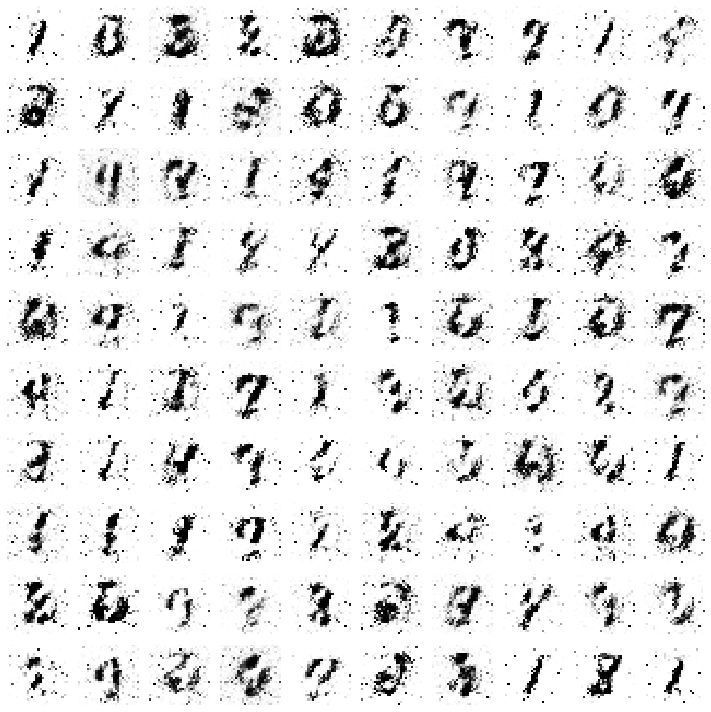

In [ ]:
train() # 내 컴퓨터에서 2~3시간 걸림

In [ ]:
generator.save("Models/vanilla_gen.h5")
discriminator.save("Models/vanilla_dis.h5")
gan.save("Models/vanilla_gan.h5")

In [ ]:
gen=tf.keras.models.load_model("Models/vanilla_gen.h5")

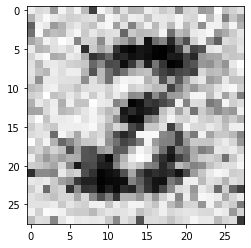

In [ ]:
made=gen(rng.randn(1,10)).numpy().reshape(28,28)
plt.imshow(made,cmap='gray_r')

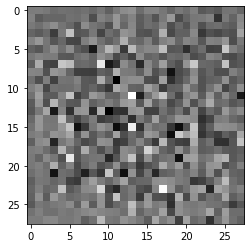

tf.Tensor([[0.5006133]], shape=(1, 1), dtype=float32)


In [ ]:
(X_train, _), (_, _) = tfkd.mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5 
X_train = X_train.reshape(-1,28,28,1)
randomDim=100
adam = tfko.Adam(learning_rate=0.0002, beta_1=0.5)
act=tfl.LeakyReLU(0.2)

# 생성자
gen = tf.keras.Sequential()
gen.add(tfl.Dense(7*7*256, use_bias=False, input_shape=(randomDim,)))
gen.add(tfl.BatchNormalization())
gen.add(act)
gen.add(tfl.Reshape((7, 7, 256)))

gen.add(tfl.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
gen.add(tfl.BatchNormalization())
gen.add(act)

gen.add(tfl.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
gen.add(tfl.BatchNormalization())
gen.add(act)

gen.add(tfl.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

# 훈련 하기 이전에 만들어지는 그림
noise = rng.normal(size=[1, 100])
gen_image = gen(noise)
plt.imshow(gen_image[0, :, :, 0], cmap='gray_r')
plt.show()

# 판별자
dis = tf.keras.Sequential()
dis.add(tfl.Conv2D(64, (5, 5), strides=(2, 2),activation=act,
                   padding='same',input_shape=[28, 28, 1]))
dis.add(tfl.Dropout(0.3))

dis.add(tfl.Conv2D(128, (5, 5), strides=(2, 2), 
                   activation=act, padding='same'))
dis.add(tfl.LeakyReLU())

dis.add(tfl.Flatten())
dis.add(tfl.Dense(1,activation='sigmoid'))
dis.compile(loss='binary_crossentropy', optimizer=adam)

#훈련전 판별자의 능력
print(dis(gen_image))

# Combined network
dis.trainable = False # 판별자는 훈련을 안 시킨다는 의미.
ganInput = tfl.Input(shape=(randomDim,))
x = gen(ganInput)
ganOutput = dis(x)
gan = tf.keras.Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=adam)

dLosses = []
gLosses = []

# Plot the loss from each batch
def DCplotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('images/dcgan_loss_epoch_{}.png'.format(epoch))
# 생성된 MNIST images 저장
def saveDCImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = rng.normal(0, 1, size=[examples, randomDim])
    generatedImages = gen.predict(noise)
    generatedImages = generatedImages.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/dcgan_generated_image_epoch_{}.png'.format(epoch))

def train(b=1,epochs=200, batchSize=128):
    batchCount = X_train.shape[0] // batchSize
    print ('Epochs:', epochs)
    print ('Batch size:', batchSize)
    print ('Batches per epoch:', batchCount)
    # 판별자 훈련의 라벨 
    yDis = np.zeros(2*batchSize)
    # 진짜에 0.9라고 라벨을 붙임. 가짜는 0
    yDis[:batchSize] = 0.9
    
    # 생성자 훈련의 라벨
    yGen = np.ones(batchSize)
    for e in range(b, epochs+1):
        print ('-'*15, 'Epoch {}'.format(e), '-'*15)
        a=time.time()
        for _ in range(batchCount):
            # 가짜 이미지를 위한 잠재 변수
            noise = rng.normal(0, 1, size=[batchSize, randomDim])
            # 진짜 이미지에서 일부 랜덤하게 선택
            imageBatch = X_train[rng.randint(0, X_train.shape[0], size=batchSize)]

            # 가짜 이미지 만들기
            generatedImages = gen.predict(noise)
            # 진짜와 가짜를 묶음
            X = np.concatenate([imageBatch, generatedImages])
            # Train discriminator
            dis.trainable = True
            dloss = dis.train_on_batch(X, yDis)
            # train_on_batch는 딱 한 번 훈련함. fit은 여러번 훈련함.

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            dis.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)
        b=time.time()
        print(int(b-a))
        if e == 1 or e % 20 == 0:
            saveDCImages(e)
            

    # Plot losses from every epoch
    DCplotLoss(e)

Epochs: 200
Batch size: 128
Batches per epoch: 468
--------------- Epoch 1 ---------------
4/4 [==============================] - 0s 4ms/step
50
4/4 [==============================] - 0s 13ms/step


FileNotFoundError: ignored

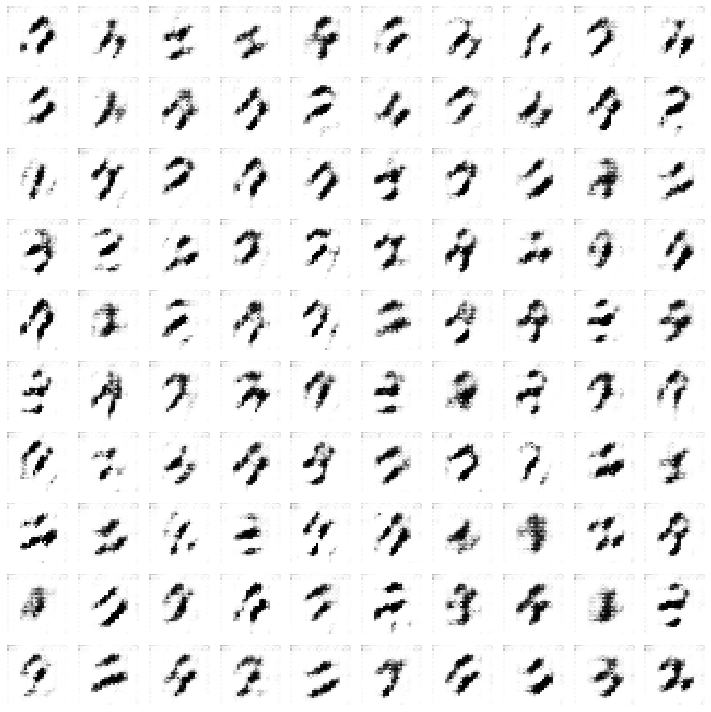

In [ ]:
train() # 내 컴퓨터에서 한 에포크에 162초 걸림. 코랩은 33초

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
rng = np.random
tfl=tf.keras.layers
tfkd=tf.keras.datasets
tfko=tf.keras.optimizers
tfka=tf.keras.activations

In [ ]:
(x_train,_),(x_test,_) = tfkd.mnist.load_data()
x_train,x_test=x_train/255,x_test/255
model=tf.keras.Sequential([
    tfl.Flatten(),
    tfl.Dense(28*28,activation='relu'),
    tfl.Dense(64,activation='relu'),
    tfl.Dense(28*28,activation='sigmoid'),
    tfl.Reshape((28,28))
])
model.compile(optimizer='adam',loss='mse')
model.fit(x_train,x_train,epochs=10,batch_size=256)

11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/10
235/235 [==============================] - 5s 6ms/step - loss: 0.0498
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0165
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0113
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0093
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0081
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0074
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0069
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0065
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0062
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0060


In [ ]:
model.evaluate(x_test,x_test,verbose=0) # 로스함수가 비슷한 값이 나온다.

0.005713962484151125

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


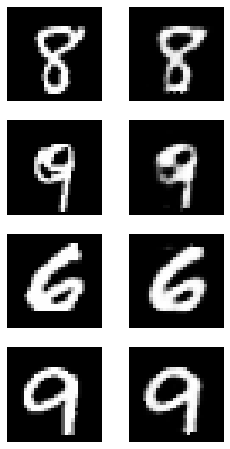

In [ ]:
plt.figure(figsize=(4,8))
rng.seed(9)
randidx=rng.choice(10000,4)
for i in range(4):
    j=randidx[i]
    plt.subplot(4,2,2*i+1)
    plt.imshow(x_test[j].reshape(28,28),cmap='gray')
    plt.axis('off')
    plt.subplot(4,2,2*i+2)
    plt.imshow(model(x_test[j:j+1]).numpy().reshape(28,28),cmap='gray')
    plt.axis('off')

In [ ]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
model=tf.keras.Sequential([
    tfl.Conv2D(32,2,strides=(2,2),activation='relu'),
    tfl.Conv2D(64,2,strides=(2,2),activation='relu'),
    tfl.Flatten(),
    tfl.Dense(64,activation='relu'),
    tfl.Dense(7*7*64,activation='relu'),
    tfl.Reshape((7,7,64)),
    tfl.Conv2DTranspose(32,2,strides=(2,2),activation='relu',padding='same'),
    tfl.Conv2DTranspose(1,2,strides=(2,2),activation='sigmoid',padding='same'),
])
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x_train,x_train,epochs=10,batch_size=256)

Epoch 1/10
235/235 [==============================] - 10s 10ms/step - loss: 0.0779
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0305
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0238
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0216
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0197
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0191
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0187
Epoch 8/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0184
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0180
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0178


In [ ]:
model.evaluate(x_test,x_test,verbose=0) # Dense 층보다는 좋은 결과

0.01726512610912323

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                200768    
                                                                 
 dense_4 (Dense)             (None, 3136)              203840    
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)      

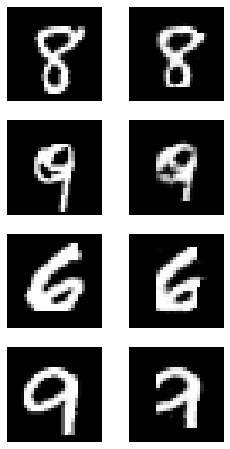

In [ ]:
plt.figure(figsize=(4,8))
for i in range(4):
    j=randidx[i]
    plt.subplot(4,2,2*i+1)
    plt.imshow(x_test[j].reshape(28,28),cmap='gray')
    plt.axis('off')
    plt.subplot(4,2,2*i+2)
    plt.imshow(model(x_test[j:j+1]).numpy().reshape(28,28),cmap='gray')
    plt.axis('off')

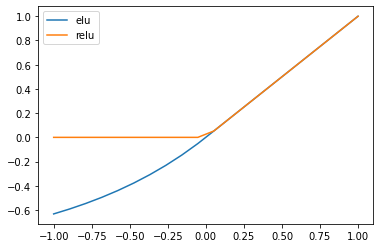

In [ ]:
a=np.linspace(-1,1,20)
b=tfka.elu(a,alpha=1).numpy()
c=tfka.relu(a).numpy()
plt.plot(a,b,label='elu')
plt.plot(a,c,label='relu')
plt.legend()

In [ ]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
model=tf.keras.Sequential([
    tfl.Conv2D(32,2,strides=(2,2),activation='elu'),
    tfl.Conv2D(64,2,strides=(2,2),activation='elu'),
    tfl.Flatten(),
    tfl.Dense(64,activation='elu'),
    tfl.Dense(7*7*64,activation='elu'),
    tfl.Reshape((7,7,64)),
    tfl.Conv2DTranspose(32,2,strides=(2,2),activation='elu',padding='same'),
    tfl.Conv2DTranspose(1,2,strides=(2,2),activation='sigmoid',padding='same'),
])
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x_train,x_train,epochs=10,batch_size=256)

Epoch 1/10
235/235 [==============================] - 3s 9ms/step - loss: 0.0549
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0198
Epoch 3/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0141
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0123
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0115
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0107
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0102
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0098
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0094
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0091


In [ ]:
model.evaluate(x_test,x_test,verbose=0)

0.008594554848968983

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                200768    
                                                                 
 dense_6 (Dense)             (None, 3136)              203840    
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 32)      

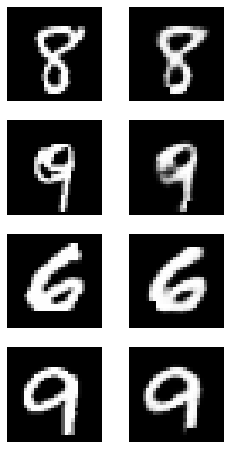

In [ ]:
plt.figure(figsize=(4,8))
for i in range(4):
    j=randidx[i]
    plt.subplot(4,2,2*i+1)
    plt.imshow(x_test[j].reshape(28,28),cmap='gray')
    plt.axis('off')
    plt.subplot(4,2,2*i+2)
    plt.imshow(model(x_test[j:j+1]).numpy().reshape(28,28),cmap='gray')
    plt.axis('off')

In [ ]:
rng.seed(1000) # 반복된 결과를 만들기 위한 시드 지정
randomDim = 10 # z의 차원
ImageL=28*28 # 784
# Load MNIST data
(X_train, _), (_, _) = tfkd.mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5 #[-1,1]로 조정
X_train = X_train.reshape(60000, ImageL) # 1차원 데이터로 만듦
adam = tfko.Adam(learning_rate=0.0002, beta_1=0.5)
act=tfl.LeakyReLU(0.2)

# 생성자 모델
generator = tf.keras.Sequential()
generator.add(tfl.Dense(256,activation=act, input_dim=randomDim))
#generator.add(act) #위에서 activation을 지정하지 않고 이렇게 층을 추가해도 됨.
generator.add(tfl.Dense(512,activation=act))
generator.add(tfl.Dense(1024,activation=act))
generator.add(tfl.Dense(ImageL, activation='tanh')) # [-1,1]의 범위. 만들어진 이미지

# 판별자 모델
ini=tf.keras.initializers.RandomNormal(stddev=0.02) # 가중치 초기값
discriminator = tf.keras.Sequential()
discriminator.add(tfl.Dense(1024, input_dim=ImageL,activation=act,
                kernel_initializer=ini))
discriminator.add(tfl.Dropout(0.3))
discriminator.add(tfl.Dense(512,activation=act))
discriminator.add(tfl.Dropout(0.3))
discriminator.add(tfl.Dense(256,activation=act))
discriminator.add(tfl.Dropout(0.3))
discriminator.add(tfl.Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)
#최종 결론은 진짜(1), 가짜 (0)이 되어야 하므로 이진 분류와 sigmoid 사용.

# Combined network
discriminator.trainable = False # 판별자는 훈련을 안 시킨다는 의미.
ganInput = tfl.Input(shape=(randomDim,))
x = generator(ganInput)
ganOutput = discriminator(x)
gan = tf.keras.Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=adam)
dLosses = []
gLosses = []

# Plot the loss from each batch
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('gan_loss_epoch_{}.png'.format(epoch))
# 생성된 MNIST images 저장
def saveGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = rng.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)
    generatedImages = generatedImages.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image_epoch_{}.png'.format(epoch))
def train(epochs=200, batchSize=128):
    batchCount = X_train.shape[0] // batchSize
    print ('Epochs:', epochs)
    print ('Batch size:', batchSize)
    print ('Batches per epoch:', batchCount)
    # 판별자 훈련의 라벨 
    yDis = np.zeros(2*batchSize)
    # 진짜에 0.9라고 라벨을 붙임. 가짜는 0
    yDis[:batchSize] = 0.9
    
    # 생성자 훈련의 라벨
    yGen = np.ones(batchSize)
    for e in range(1, epochs+1):
        print ('-'*15, 'Epoch {}'.format(e), '-'*15)
        a=time.time()
        for _ in range(batchCount):
            # 가짜 이미지를 위한 잠재 변수
            noise = rng.normal(0, 1, size=[batchSize, randomDim])
            # 진짜 이미지에서 일부 랜덤하게 선택
            imageBatch = X_train[rng.randint(0, X_train.shape[0], size=batchSize)]

            # 가짜 이미지 만들기
            generatedImages = generator.predict(noise)
            # 진짜와 가짜를 묶음
            X = np.concatenate([imageBatch, generatedImages])
            # Train discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)
            # train_on_batch는 딱 한 번 훈련함. fit은 여러번 훈련함.

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)
        b=time.time()
        print(int(b-a))
        if e == 1 or e % 20 == 0:
            saveGeneratedImages(e)
    # Plot losses from every epoch
    plotLoss(e)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4/4 [==============================] - 0s 6ms/step
44
--------------- Epoch 109 ---------------
4/4 [==============================] - 0s 3ms/step
44
--------------- Epoch 110 ---------------
4/4 [==============================] - 0s 5ms/step
45
--------------- Epoch 111 ---------------
4/4 [==============================] - 0s 3ms/step
46
--------------- Epoch 112 ---------------
4/4 [==============================] - 0s 7ms/step
44
--------------- Epoch 113 ---------------
4/4 [==============================] - 0s 4ms/step
45
--------------- Epoch 114 ---------------
4/4 [==============================] - 0s 3ms/step
44
--------------- Epoch 115 ---------------
4/4 [==============================] - 0s 3ms/step
44
--------------- Epoch 116 ---------------
4/4 [==============================] - 0s 7ms/step
45
--------------- Epoch 117 ---------------
4/4 [==============================] - 0s 4ms/step
45
--------------- Epoch 118 ---------------
4/4 

KeyboardInterrupt: ignored

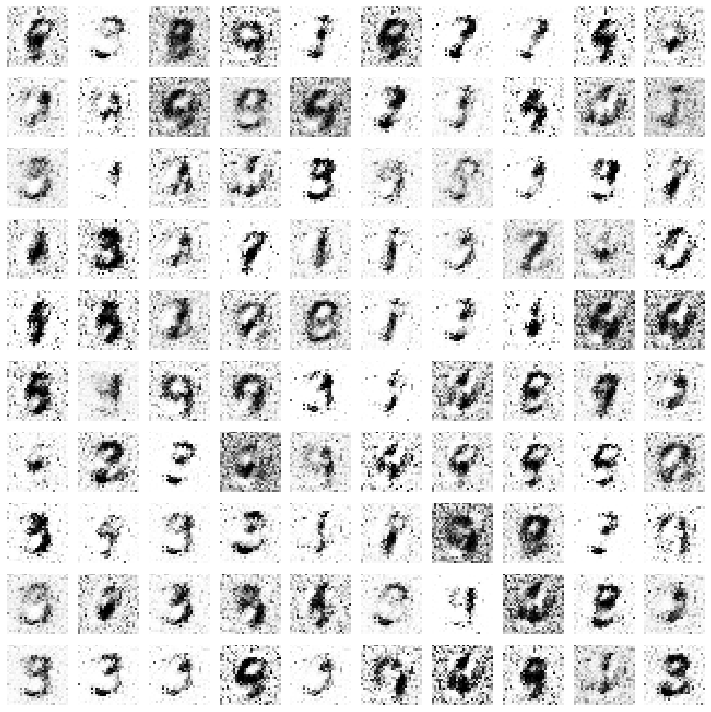

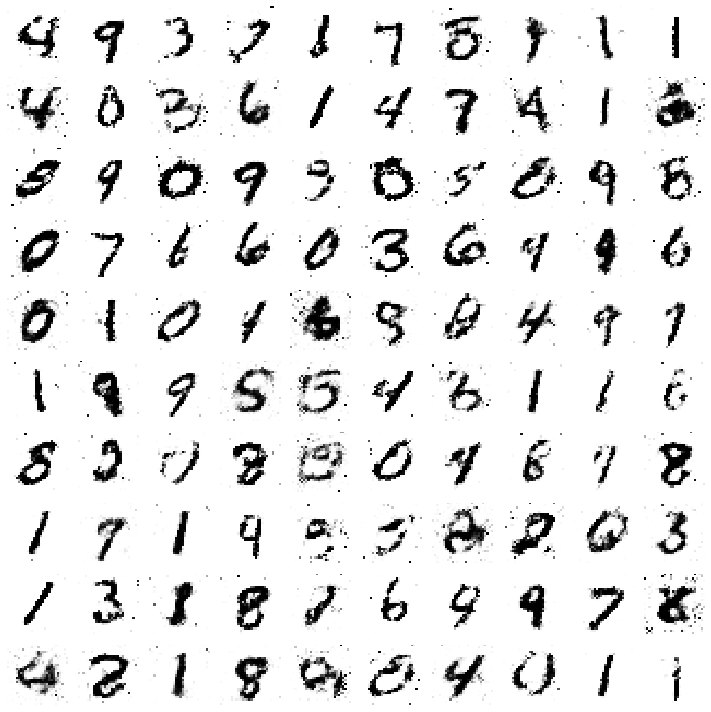

In [ ]:
train() # 내 컴퓨터에서 2~3시간 걸림

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
rng = np.random
tfl=tf.keras.layers
tfkd=tf.keras.datasets
tfko=tf.keras.optimizers
tfka=tf.keras.activations

In [ ]:
(x_train,_),(x_test,_) = tfkd.mnist.load_data()
x_train,x_test=x_train/255,x_test/255
model=tf.keras.Sequential([
    tfl.Flatten(),
    tfl.Dense(28*28,activation='relu'),
    tfl.Dense(64,activation='relu'),
    tfl.Dense(28*28,activation='sigmoid'),
    tfl.Reshape((28,28))
])
model.compile(optimizer='adam',loss='mse')
model.fit(x_train,x_train,epochs=10,batch_size=256)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
235/235 [==============================] - 5s 5ms/step - loss: 0.0518
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0182
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0129
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0109
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0097
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0089
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0084
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0080
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0077
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0074


In [ ]:
(X_train, _), (_, _) = tfkd.cifar10.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5 
randomDim=100
gadam = tfko.Adam(learning_rate=1e-4, beta_1=0.5)
dadam = tfko.Adam(learning_rate=1e-3, beta_1=0.5)
act=tfl.LeakyReLU()
actg=tfl.ReLU()
# 생성자
gen = tf.keras.Sequential()
gen.add(tfl.Dense(2048, input_shape=(randomDim,)))
gen.add(tfl.BatchNormalization())
gen.add(actg)
gen.add(tfl.Reshape((2, 2, 512)))

gen.add(tfl.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same'))
gen.add(tfl.BatchNormalization())
gen.add(actg)

gen.add(tfl.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same'))
gen.add(tfl.BatchNormalization())
gen.add(actg)

gen.add(tfl.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
gen.add(tfl.BatchNormalization())
gen.add(actg)

gen.add(tfl.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', activation='tanh'))


dis = tf.keras.Sequential()
dis.add(tfl.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
#dis.add(tfl.BatchNormalization())
dis.add(act)

dis.add(tfl.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
dis.add(tfl.BatchNormalization())
dis.add(act)

dis.add(tfl.Conv2D(256, (5, 5), strides=(2, 2),padding='same'))
dis.add(tfl.BatchNormalization())
dis.add(act)

dis.add(tfl.Conv2D(512, (5, 5), strides=(2, 2),padding='same'))
dis.add(tfl.BatchNormalization())
dis.add(act)

dis.add(tfl.Flatten())
dis.add(tfl.Dense(1,activation='sigmoid'))
dis.compile(loss='binary_crossentropy', optimizer=dadam)

# Combined network
dis.trainable = False # 판별자는 훈련을 안 시킨다는 의미.
ganInput = tfl.Input(shape=(randomDim,))
x = gen(ganInput)
ganOutput = dis(x)
gan = tf.keras.Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=gadam)

dLosses = []
gLosses = []

# Plot the loss from each batch
def DCplotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('cf10_dcgan_loss_epoch_{}.png'.format(epoch))
def saveDCImages(epoch, examples=16, dim=(4, 4), figsize=(4, 4)):
    noise = rng.normal(0, 1, size=[examples, randomDim])
    generatedImages = gen.predict(noise)
    generatedImages = generatedImages.reshape(examples, 32, 32, 3)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(0.5*(generatedImages[i]+1), interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('cf10_dcgan_generated_image_epoch_{}.png'.format(epoch))

def train(epochs=200, batchSize=128):
    batchCount = X_train.shape[0] // batchSize
    print ('Epochs:', epochs)
    print ('Batch size:', batchSize)
    print ('Batches per epoch:', batchCount)
    # 판별자 훈련의 라벨 
    yDis = np.zeros(2*batchSize)
    # 진짜에 0.9라고 라벨을 붙임. 가짜는 0
    yDis[:batchSize] = 0.9
    
    # 생성자 훈련의 라벨
    yGen = np.ones(batchSize)
    for e in range(1, epochs+1):
        print ('-'*15, 'Epoch {}'.format(e), '-'*15)
        a=time.time()
        for _ in range(batchCount):
            # 가짜 이미지를 위한 잠재 변수
            noise = rng.normal(0, 1, size=[batchSize, randomDim])
            # 진짜 이미지에서 일부 랜덤하게 선택
            imageBatch = X_train[rng.randint(0, X_train.shape[0], size=batchSize)]

            # 가짜 이미지 만들기
            generatedImages = gen.predict(noise)
            # 진짜와 가짜를 묶음
            X = np.concatenate([imageBatch, generatedImages])
            # Train discriminator
            dis.trainable = True
            dloss = dis.train_on_batch(X, yDis)
            # train_on_batch는 딱 한 번 훈련함. fit은 여러번 훈련함.

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            dis.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)
        b=time.time()
        print(int(b-a))
        saveDCImages(e)
        #if e == 1 or e % 20 == 0:
            #saveDCImages(e)
            

    # Plot losses from every epoch
    DCplotLoss(e)

170498071/170498071 [==============================] - 2s 0us/step


Epochs: 10
Batch size: 128
Batches per epoch: 390
--------------- Epoch 1 ---------------
4/4 [==============================] - 0s 4ms/step
66
1/1 [==============================] - 0s 197ms/step
--------------- Epoch 2 ---------------
4/4 [==============================] - 0s 4ms/step
67
1/1 [==============================] - 0s 15ms/step
--------------- Epoch 3 ---------------
4/4 [==============================] - 0s 4ms/step
69
1/1 [==============================] - 0s 16ms/step
--------------- Epoch 4 ---------------
4/4 [==============================] - 0s 4ms/step
71
1/1 [==============================] - 0s 17ms/step
--------------- Epoch 5 ---------------
4/4 [==============================] - 0s 4ms/step
69
1/1 [==============================] - 0s 22ms/step
--------------- Epoch 6 ---------------
4/4 [==============================] - 0s 7ms/step
70
1/1 [==============================] - 0s 17ms/step
--------------- Epoch 7 ---------------
4/4 [============================

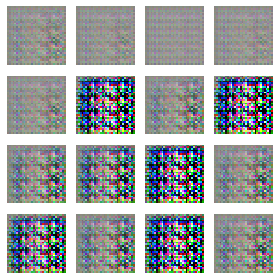

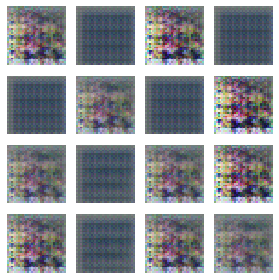

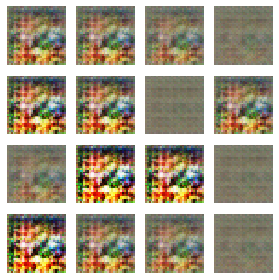

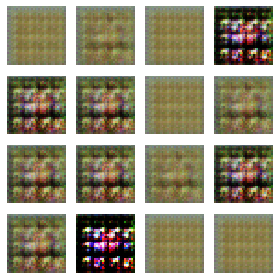

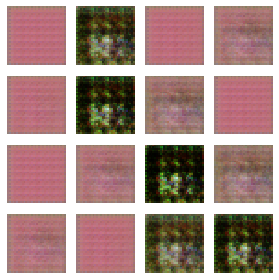

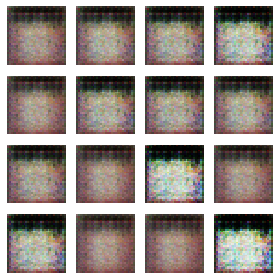

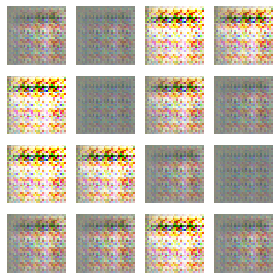

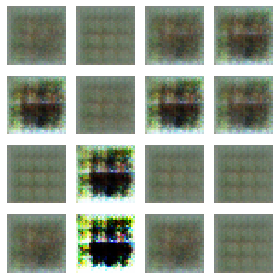

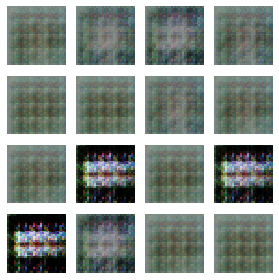

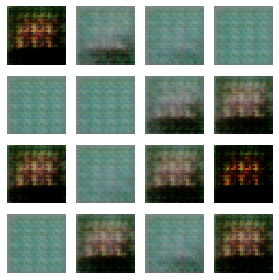

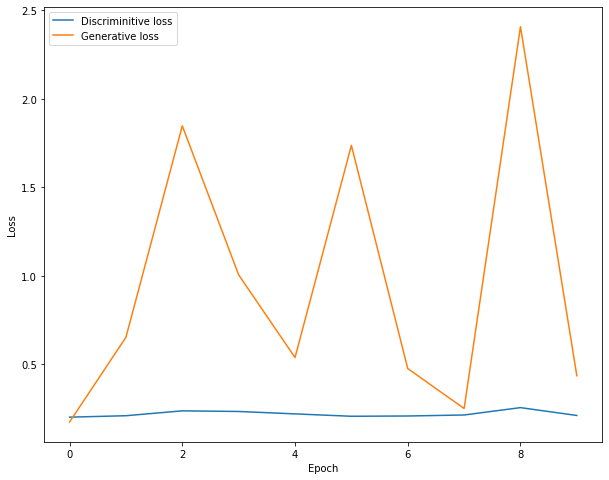

In [ ]:
train(10)

In [ ]:
(X_train, _), (_, _) = tfkd.cifar10.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5 
randomDim=100
gadam = tfko.Adam(learning_rate=0.0002, beta_1=0.5)
dadam = tfko.Adam(learning_rate=0.0002, beta_1=0.5)
act=tfl.LeakyReLU()
actg=tfl.ReLU()
# 생성자
gen = tf.keras.Sequential()
gen.add(tfl.Dense(2048, input_shape=(randomDim,)))
gen.add(tfl.BatchNormalization())
gen.add(actg)
gen.add(tfl.Reshape((2, 2, 512)))

gen.add(tfl.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
gen.add(tfl.BatchNormalization())
gen.add(actg)

gen.add(tfl.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
gen.add(tfl.BatchNormalization())
gen.add(actg)

gen.add(tfl.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
gen.add(tfl.BatchNormalization())
gen.add(actg)

gen.add(tfl.Conv2D(3, (5, 5), strides=(2, 2), padding='same', activation='tanh'))


dis = tf.keras.Sequential()
dis.add(tfl.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
#dis.add(tfl.BatchNormalization())
dis.add(act)

dis.add(tfl.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
dis.add(tfl.BatchNormalization())
dis.add(act)

dis.add(tfl.Conv2D(256, (5, 5), strides=(2, 2),padding='same'))
dis.add(tfl.BatchNormalization())
dis.add(act)

dis.add(tfl.Conv2D(512, (5, 5), strides=(2, 2),padding='same'))
dis.add(tfl.BatchNormalization())
dis.add(act)

dis.add(tfl.Flatten())
dis.add(tfl.Dense(1,activation='sigmoid'))
dis.compile(loss='binary_crossentropy', optimizer=dadam)

# Combined network
dis.trainable = False # 판별자는 훈련을 안 시킨다는 의미.
ganInput = tfl.Input(shape=(randomDim,))
x = gen(ganInput)
ganOutput = dis(x)
gan = tf.keras.Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=gadam)

dLosses = []
gLosses = []

# Plot the loss from each batch
def DCplotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('cf10_dcgan_loss_epoch_{}.png'.format(epoch))
def saveDCImages(epoch, examples=16, dim=(4, 4), figsize=(4, 4)):
    noise = rng.normal(0, 1, size=[examples, randomDim])
    generatedImages = gen.predict(noise)
    generatedImages = generatedImages.reshape(examples, 32, 32, 3)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(0.5*(generatedImages[i]+1), interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('cf10_dcgan_generated_image_epoch_{}.png'.format(epoch))

def train(epochs=200, batchSize=128):
    batchCount = X_train.shape[0] // batchSize
    print ('Epochs:', epochs)
    print ('Batch size:', batchSize)
    print ('Batches per epoch:', batchCount)
    # 판별자 훈련의 라벨 
    yDis = np.zeros(2*batchSize)
    # 진짜에 0.9라고 라벨을 붙임. 가짜는 0
    yDis[:batchSize] = 0.9
    
    # 생성자 훈련의 라벨
    yGen = np.ones(batchSize)
    for e in range(1, epochs+1):
        print ('-'*15, 'Epoch {}'.format(e), '-'*15)
        a=time.time()
        for _ in range(batchCount):
            # 가짜 이미지를 위한 잠재 변수
            noise = rng.normal(0, 1, size=[batchSize, randomDim])
            # 진짜 이미지에서 일부 랜덤하게 선택
            imageBatch = X_train[rng.randint(0, X_train.shape[0], size=batchSize)]

            # 가짜 이미지 만들기
            generatedImages = gen.predict(noise)
            # 진짜와 가짜를 묶음
            X = np.concatenate([imageBatch, generatedImages])
            # Train discriminator
            dis.trainable = True
            dloss = dis.train_on_batch(X, yDis)
            # train_on_batch는 딱 한 번 훈련함. fit은 여러번 훈련함.

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            dis.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)
        b=time.time()
        print(int(b-a))
        saveDCImages(e)
        #if e == 1 or e % 20 == 0:
            #saveDCImages(e)
            

    # Plot losses from every epoch
    DCplotLoss(e)

In [ ]:
train(10)

Epochs: 10
Batch size: 128
Batches per epoch: 390
--------------- Epoch 1 ---------------
4/4 [==============================] - 0s 7ms/step


ValueError: ignored

# 기말 연습

합성곱

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
rng=np.random
tfl=tf.keras.layers
tfkd=tf.keras.datasets

In [ ]:
#lenna 사진(오류발생)#############################
import matplotlib.image as mpimg

In [ ]:
#MNIST 데이터 분석
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
rng=np.random
tfl=tf.keras.layers
tfkd=tf.keras.datasets

(x_tr0,y_train),(x_te0,y_test)=tfkd.mnist.load_data()
x_train=x_tr0.reshape(-1,28,28,1).astype(np.float32)/255
x_test=x_te0.reshape(-1,28,28,1).astype(np.float32)/255
ks=5
lossf="sparse_categorical_crossentropy"

In [ ]:
model=tf.keras.Sequential([
    tfl.Conv2D(32,ks,padding="same",activation='relu'),
    tfl.MaxPool2D(),
    tfl.Conv2D(64,ks,padding="same",activation='relu'),
    tfl.MaxPool2D(),
    tfl.Flatten(),
    tfl.Dense(127,activation='relu'),
    tfl.Dense(10,activation='softmax')
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=10,batch_size=100,verbose=2)

Epoch 1/10
600/600 - 4s - loss: 0.1515 - accuracy: 0.9554 - 4s/epoch - 7ms/step
Epoch 2/10
600/600 - 2s - loss: 0.0444 - accuracy: 0.9863 - 2s/epoch - 4ms/step
Epoch 3/10
600/600 - 3s - loss: 0.0304 - accuracy: 0.9902 - 3s/epoch - 5ms/step
Epoch 4/10
600/600 - 3s - loss: 0.0212 - accuracy: 0.9931 - 3s/epoch - 5ms/step
Epoch 5/10
600/600 - 2s - loss: 0.0176 - accuracy: 0.9946 - 2s/epoch - 4ms/step
Epoch 6/10
600/600 - 2s - loss: 0.0137 - accuracy: 0.9955 - 2s/epoch - 4ms/step
Epoch 7/10
600/600 - 2s - loss: 0.0110 - accuracy: 0.9965 - 2s/epoch - 4ms/step
Epoch 8/10
600/600 - 2s - loss: 0.0081 - accuracy: 0.9973 - 2s/epoch - 4ms/step
Epoch 9/10
600/600 - 2s - loss: 0.0085 - accuracy: 0.9972 - 2s/epoch - 4ms/step
Epoch 10/10
600/600 - 2s - loss: 0.0060 - accuracy: 0.9981 - 2s/epoch - 4ms/step


In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print(score)

[0.028469854965806007, 0.9915000200271606]


RNN(순차데이터)

In [ ]:
#simpleRNN 학습하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
rng=np.random
tfl=tf.keras.layers
tfkd=tf.keras.datasets

In [ ]:
seq=np.arange(0.1,10,0.1)
ls=len(seq)
T=10
X=[]
Y=[]
lss=ls-T
for i in range(lss):
  X+=[seq[i:i+T]]
  Y+=[seq[i+T]]
X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)

In [ ]:
model=tf.keras.Sequential([
    tfl.SimpleRNN(5,return_sequences=True),
    tfl.SimpleRNN(5,return_sequences=False),
    tfl.Dense(1)
])
model.compile(loss='mse',optimizer='adam')
history=model.fit(X,Y,epochs=200,verbose=2)

Epoch 1/200
3/3 - 1s - loss: 33.3679 - 1s/epoch - 388ms/step
Epoch 2/200
3/3 - 0s - loss: 32.8739 - 49ms/epoch - 16ms/step
Epoch 3/200
3/3 - 0s - loss: 32.3842 - 48ms/epoch - 16ms/step
Epoch 4/200
3/3 - 0s - loss: 31.8873 - 49ms/epoch - 16ms/step
Epoch 5/200
3/3 - 0s - loss: 31.4036 - 47ms/epoch - 16ms/step
Epoch 6/200
3/3 - 0s - loss: 30.9111 - 48ms/epoch - 16ms/step
Epoch 7/200
3/3 - 0s - loss: 30.3782 - 48ms/epoch - 16ms/step
Epoch 8/200
3/3 - 0s - loss: 29.8687 - 49ms/epoch - 16ms/step
Epoch 9/200
3/3 - 0s - loss: 29.3451 - 48ms/epoch - 16ms/step
Epoch 10/200
3/3 - 0s - loss: 28.8123 - 47ms/epoch - 16ms/step
Epoch 11/200
3/3 - 0s - loss: 28.2745 - 54ms/epoch - 18ms/step
Epoch 12/200
3/3 - 0s - loss: 27.6967 - 49ms/epoch - 16ms/step
Epoch 13/200
3/3 - 0s - loss: 27.1225 - 48ms/epoch - 16ms/step
Epoch 14/200
3/3 - 0s - loss: 26.5312 - 56ms/epoch - 19ms/step
Epoch 15/200
3/3 - 0s - loss: 25.9419 - 59ms/epoch - 20ms/step
Epoch 16/200
3/3 - 0s - loss: 25.3817 - 58ms/epoch - 19ms/step
Ep

In [ ]:
pred=model(X).numpy().reshape(-1,1)
com=np.append(Y.reshape(-1,1),pred,axis=1)
pd.DataFrame(com,columns=['Y','prediction'])

,Y,prediction
0,1.1,1.547284
1,1.2,1.553857
2,1.3,1.563019
3,1.4,1.573833
4,1.5,1.586280
...,...,...
84,9.5,5.698248
85,9.6,5.698383
86,9.7,5.698511
87,9.8,5.698634


In [ ]:
#simpleRNN 연습문제 sin함수를 예측하는 RNN코드 만들어 학습
seq=np.sin(np.arange(0,np.pi,np.pi/1000))
ls=len(seq)
T=4
X=[]
Y=[]
lss=ls-T
for i in range(lss):
  X+=[seq[i:i+T]]
  Y+=[seq[i+T]]
X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)

In [ ]:
model=tf.keras.Sequential([
    tfl.LSTM(200,return_sequences=True),
    tfl.LSTM(200,return_sequences=False),
    tfl.Dense(1)
])
model.compile(loss='mse',optimizer='adam')
history=model.fit(X,Y,epochs=20,verbose=1)
print(history)

Epoch 1/20
32/32 [==============================] - 6s 11ms/step - loss: 0.0775
Epoch 2/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 3/20
32/32 [==============================] - 0s 8ms/step - loss: 1.1809e-04
Epoch 4/20
32/32 [==============================] - 0s 8ms/step - loss: 4.6700e-05
Epoch 5/20
32/32 [==============================] - 0s 7ms/step - loss: 4.7536e-05
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 4.6787e-05
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 4.5295e-05
Epoch 8/20
32/32 [==============================] - 0s 5ms/step - loss: 4.4390e-05
Epoch 9/20
32/32 [==============================] - 0s 5ms/step - loss: 4.4292e-05
Epoch 10/20
32/32 [==============================] - 0s 5ms/step - loss: 4.2768e-05
Epoch 11/20
32/32 [==============================] - 0s 6ms/step - loss: 4.4051e-05
Epoch 12/20
32/32 [==============================] - 0s 6ms/step - loss: 4.3373e-05
Epoch 13

In [ ]:
pred=model(X).numpy().reshape(-1,1)
com=np.append(Y.reshape(-1,1),pred,axis=1)
pd.DataFrame(com,columns=['Y','prediction'])

,Y,prediction
0,0.012566,0.005457
1,0.015707,0.008550
2,0.018848,0.011645
3,0.021989,0.014739
4,0.025130,0.017834
...,...,...
991,0.015707,0.026332
992,0.012566,0.023236
993,0.009425,0.020140
994,0.006283,0.017044


과대적합

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
rng=np.random
tfl=tf.keras.layers
tfkd=tf.keras.datasets

In [ ]:
(AXtr,AYtr),(AXte,AYte)=tfkd.imdb.load_data()

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
(Xtr,Ytr),(Xte,Yte)=tfkd.imdb.load

오터인코더

In [ ]:
#오더인코더 MNIST에 적용(자기 자신을 재생성하는 네트워크)(Dense층)
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
rng=np.random
tfl=tf.keras.layers
tfkd=tf.keras.datasets

In [ ]:
(x_train,_),(x_test,_)=tfkd.mnist.load_data()
x_train,x_test=x_train/255,x_test/255
model=tf.keras.Sequential([
    tfl.Flatten(),
    tfl.Dense(28*28,activation='relu'),
    tfl.Dense(64,activation='relu'),
    tfl.Dense(28*28,activation='sigmoid'),
    tfl.Reshape((28,28))
])
model.compile(optimizer='adam',loss='mse')
model.fit(x_train,x_train,epochs=10,batch_size=256)

Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0482
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0159
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0110
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0091
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0080
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0073
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0067
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0063
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0061
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0058


In [ ]:
model.evaluate(x_test,x_test,verbose=0)

0.0055611757561564445

In [ ]:
#Conv2D
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
rng=np.random
tfl=tf.keras.layers
tfkd=tf.keras.datasets

In [ ]:
(x_train,_),(x_test,_)=tfkd.mnist.load_data()
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
model=tf.keras.Sequential([
    tfl.Conv2D(32,2,strides=(2,2),activation='relu'),
    tfl.Conv2D(64,2,strides=(2,2),activation='relu'),
    tfl.Flatten(),
    tfl.Dense(64,activation='relu'),
    tfl.Dense(7*7*64,activation='relu'),
    tfl.Reshape((7,7,64)),
    tfl.Conv2DTranspose(32,2,strides=(2,2),activation='relu',padding='same'),
    tfl.Conv2DTranspose(1,2,strides=(2,2),activation='sigmoid',padding='same')
])
model.compile(optimizer='adam',loss='mse')

In [ ]:
x_train=x_train.reshape(-1,28,28,1)
x_train=x_train.astype(np.float32)
x_test=x_test.reshape(-1,28,28,1)
model=tf.keras.Sequential([
 tfl.Conv2D(32,2,strides=(2,2),activation='relu'),
 tfl.Conv2D(64,2,strides=(2,2),activation='relu'),
 tfl.Flatten(),
 tfl.Dense(64,activation='relu'),
 tfl.Dense(7*7*64,activation='relu'),
 tfl.Reshape((7,7,64)),
 tfl.Conv2DTranspose(32,2,strides=(2,2),activation='relu',padding='same'),
 tfl.Conv2DTranspose(1,2,strides=(2,2),activation='sigmoid',padding='same'),
])
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x_train,x_train,epochs=10,batch_size=256)

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 7217.6074
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 7217.1616
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 7217.1621
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 7217.1621
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 7217.1597
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 7217.1606
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 7217.1523
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 7217.1294
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 7216.9062
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 7216.7300


In [ ]:
model.evaluate(x_test,x_test,verbose=0)

7342.89111328125

In [ ]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
model=tf.keras.Sequential([
 tfl.Conv2D(32,2,strides=(2,2),activation='elu'),
 tfl.Conv2D(64,2,strides=(2,2),activation='elu'),
 tfl.Flatten(),
 tfl.Dense(64,activation='elu'),
 tfl.Dense(7*7*64,activation='elu'),
 tfl.Reshape((7,7,64)),
 tfl.Conv2DTranspose(32,2,strides=(2,2),activation='elu',padding='same'),
 tfl.Conv2DTranspose(1,2,strides=(2,2),activation='sigmoid',padding='same')
])
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x_train,x_train,epochs=10,batch_size=256)

Epoch 1/10
235/235 [==============================] - 3s 8ms/step - loss: 7217.7847
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 7217.0405
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 7217.0156
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 7216.9961
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 7216.7905
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 7216.7168
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 7216.6943
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 7216.6816
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 7216.6724
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 7216.6685


In [ ]:
model.evaluate(x_test,x_test,verbose=0)

7342.876953125

합성곱 MNIST

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
rng=np.random
tfl=tf.keras.layers
tfkd=tf.keras.datasets

In [ ]:
(x_tr0,y_train),(x_te0,y_test)=tfkd.mnist.load_data()
x_train=x_tr0.reshape(-1,28,28,1).astype(np.float32)/255
x_test=x_te0.reshape(-1,28,28,1).astype(np.float32)/255
ks=5
lossf="sparse_categorical_crossentropy"

In [ ]:
model=tf.keras.Sequential([
    tfl.Conv2D(32,5,padding='same',activation='relu'),
    tfl.MaxPool2D(),
    tfl.Conv2D(64,5,padding='same',activation='relu'),
    tfl.MaxPool2D(),
    tfl.Flatten(),
    tfl.Dense(127,activation='relu'),
    tfl.Dense(10,activation='sigmoid')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=100,verbose=2)

Epoch 1/10
600/600 - 4s - loss: 0.1547 - accuracy: 0.9538 - 4s/epoch - 6ms/step
Epoch 2/10
600/600 - 2s - loss: 0.0439 - accuracy: 0.9859 - 2s/epoch - 4ms/step
Epoch 3/10
600/600 - 2s - loss: 0.0295 - accuracy: 0.9906 - 2s/epoch - 4ms/step
Epoch 4/10
600/600 - 2s - loss: 0.0223 - accuracy: 0.9929 - 2s/epoch - 4ms/step
Epoch 5/10
600/600 - 2s - loss: 0.0168 - accuracy: 0.9947 - 2s/epoch - 4ms/step
Epoch 6/10
600/600 - 2s - loss: 0.0131 - accuracy: 0.9958 - 2s/epoch - 4ms/step
Epoch 7/10
600/600 - 2s - loss: 0.0102 - accuracy: 0.9966 - 2s/epoch - 4ms/step
Epoch 8/10
600/600 - 2s - loss: 0.0096 - accuracy: 0.9969 - 2s/epoch - 4ms/step
Epoch 9/10
600/600 - 2s - loss: 0.0094 - accuracy: 0.9973 - 2s/epoch - 4ms/step
Epoch 10/10
600/600 - 2s - loss: 0.0083 - accuracy: 0.9973 - 2s/epoch - 4ms/step


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
rng=np.random
tfl=tf.keras.layers
tfkd=tf.keras.datasets

In [ ]:
(x_tr0,y_train),(x_te0,y_test)=tfkd.mnist.load_data()
x_train=x_tr0.reshape(-1,28,28,1).astype(np.float32)/255
x_test=x_te0.reshape(-1,28,28,1).astype(np.float32)/255

In [ ]:
model=tf.keras.Sequential([
    tfl.Conv2D(32,5,padding='same',activation='relu'),
    tfl.MaxPool2D(),
    tfl.Conv2D(64,5,padding='same',activation='relu'),
    tfl.MaxPool2D(),
    tfl.Flatten(),
    tfl.Dense(127,activation='relu'),
    tfl.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=100,epochs=10,verbose=2)

Epoch 1/10
600/600 - 3s - loss: 0.1506 - accuracy: 0.9547 - 3s/epoch - 6ms/step
Epoch 2/10
600/600 - 3s - loss: 0.0418 - accuracy: 0.9871 - 3s/epoch - 6ms/step
Epoch 3/10
600/600 - 3s - loss: 0.0285 - accuracy: 0.9910 - 3s/epoch - 4ms/step
Epoch 4/10
600/600 - 3s - loss: 0.0219 - accuracy: 0.9932 - 3s/epoch - 4ms/step
Epoch 5/10
600/600 - 3s - loss: 0.0165 - accuracy: 0.9945 - 3s/epoch - 6ms/step
Epoch 6/10
600/600 - 3s - loss: 0.0133 - accuracy: 0.9958 - 3s/epoch - 5ms/step
Epoch 7/10
600/600 - 3s - loss: 0.0106 - accuracy: 0.9966 - 3s/epoch - 4ms/step
Epoch 8/10
600/600 - 3s - loss: 0.0094 - accuracy: 0.9971 - 3s/epoch - 5ms/step
Epoch 9/10
600/600 - 3s - loss: 0.0074 - accuracy: 0.9975 - 3s/epoch - 4ms/step
Epoch 10/10
600/600 - 3s - loss: 0.0053 - accuracy: 0.9982 - 3s/epoch - 5ms/step


In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print(score)

[0.029233478009700775, 0.9916999936103821]


In [ ]:
(x_tr0,y_train),(x_te0,y_test)=tfkd.fashion_mnist.load_data()
x_train=x_tr0.reshape(-1,28,28,1).astype(np.float32)/255
x_test=x_te0.reshape(-1,28,28,1).astype(np.float32)/255

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
model=tf.keras.Sequential([
    tfl.Conv2D(32,5,padding='same',activation='relu'),
    tfl.MaxPooling2D(),
    tfl.Conv2D(64,5,padding='same',activation='relu'),
    tfl.MaxPooling2D(),
    tfl.Flatten(),
    tfl.Dense(127,activation='relu'),
    tfl.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=100,epochs=10,verbose=2)

Epoch 1/10
600/600 - 3s - loss: 0.4605 - accuracy: 0.8328 - 3s/epoch - 5ms/step
Epoch 2/10
600/600 - 3s - loss: 0.2927 - accuracy: 0.8941 - 3s/epoch - 5ms/step
Epoch 3/10
600/600 - 2s - loss: 0.2494 - accuracy: 0.9092 - 2s/epoch - 4ms/step
Epoch 4/10
600/600 - 3s - loss: 0.2192 - accuracy: 0.9189 - 3s/epoch - 5ms/step
Epoch 5/10
600/600 - 3s - loss: 0.1960 - accuracy: 0.9281 - 3s/epoch - 4ms/step
Epoch 6/10
600/600 - 3s - loss: 0.1741 - accuracy: 0.9361 - 3s/epoch - 4ms/step
Epoch 7/10
600/600 - 3s - loss: 0.1561 - accuracy: 0.9424 - 3s/epoch - 4ms/step
Epoch 8/10
600/600 - 3s - loss: 0.1386 - accuracy: 0.9483 - 3s/epoch - 6ms/step
Epoch 9/10
600/600 - 3s - loss: 0.1220 - accuracy: 0.9548 - 3s/epoch - 4ms/step
Epoch 10/10
600/600 - 3s - loss: 0.1062 - accuracy: 0.9608 - 3s/epoch - 4ms/step


In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print(score)

[0.25542017817497253, 0.9139999747276306]


RNN **순환신경망**

In [ ]:
#등차수열 다음항 예측하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
rng=np.random
tfl=tf.keras.layers

In [ ]:
seq=np.arange(0.1,10,0.1)
ls=len(seq)
T=10
X=[]
Y=[]
lss=ls-T
for i in range(lss):
 X+=[seq[i:i+T]]
 Y+=[seq[i+T]]
X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)

In [ ]:
model=tf.keras.Sequential([
    tfl.SimpleRNN(5,return_sequences=True),
    tfl.SimpleRNN(5,return_sequences=False),
    tfl.Dense(1)
])
model.compile(loss='mse',optimizer='adam')
history=model.fit(X,Y,epochs=50,verbose=0)

In [ ]:
#pandas로 결과
pred=model(X).numpy().reshape(-1,1)
com=np.append(Y.reshape(-1,1),pred,axis=1)
pd.DataFrame(com,columns=['Y','prediction'])

,Y,prediction
0,1.1,1.737028
1,1.2,1.779701
2,1.3,1.813052
3,1.4,1.840870
4,1.5,1.864920
...,...,...
84,9.5,1.875988
85,9.6,1.875176
86,9.7,1.874355
87,9.8,1.873525


In [ ]:
#sin함수 예측 RNN
seq=np.sin(np.arange(0,np.pi,np.pi/1000))
ls=len(seq)
T=4
X=[]
Y=[]
lss=ls-T
for i in range(lss):
  X+=[seq[i:i+T]]
  Y+=[seq[i+T]]
X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)

In [ ]:
model=tf.keras.Sequential([
    tfl.LSTM(200,return_sequences=True),
    tfl.LSTM(200,return_sequences=False),
    tfl.Dense(1)
])
model.compile(optimizer='adam',loss='mse')
model.fit(X,Y,epochs=100,verbose=0)

In [ ]:
pred=model(X).numpy().reshape(-1,1)
com=np.append(Y.reshape(-1,1),pred,axis=1)
pd.DataFrame(com,columns=['Y','prediction'])

,Y,prediction
0,0.012566,0.007170
1,0.015707,0.010278
2,0.018848,0.013387
3,0.021989,0.016496
4,0.025130,0.019606
...,...,...
991,0.015707,0.027724
992,0.012566,0.024614
993,0.009425,0.021504
994,0.006283,0.018394


**오터인코더** 자기 자신을 재생성하는 네트워크

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
rng=np.random
tfl=tf.keras.layers
tfkd=tf.keras.datasets

In [ ]:
(x_train,_),(x_test,_)=tfkd.mnist.load_data()
x_train=x_train/255
x_test=x_test/255
model=tf.keras.Sequential([
    tfl.Flatten(),
    tfl.Dense(28*28,activation='relu'),
    tfl.Dense(64,activation='relu'),
    tfl.Dense(28*28,activation='sigmoid'),
    tfl.Reshape((28,28))
])
model.compile(optimizer='adam',loss='mse')
model.fit(x_train,x_train,epochs=10,batch_size=256)

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.0505
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0175
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0124
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0102
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0089
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0081
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0076
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0072
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0068
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0066


In [ ]:
model.evaluate(x_test,x_test,verbose=0)

0.006305569317191839

In [ ]:
(x_train,_),(x_test,_)=tfkd.mnist.load_data()
x_train=x_train.reshape(-1,28,28,1).astype(np.float32)/255
x_test=x_test.reshape(-1,28,28,1).astype(np.float32)/255
model=tf.keras.Sequential([
    tfl.Conv2D(32,2,strides=(2,2),activation='relu'),
    tfl.Conv2D(64,2,strides=(2,2),activation='relu'),
    tfl.Flatten(),
    tfl.Dense(64,activation='relu'),
    tfl.Dense(7*7*64,activation='relu'),
    tfl.Reshape((7,7,64)),
    tfl.Conv2DTranspose(32,2,strides=(2,2),activation='relu',padding='same'),
    tfl.Conv2DTranspose(1,2,strides=(2,2),activation='sigmoid',padding='same'),
])
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x_train,x_train,epochs=10,batch_size=256)

Epoch 1/10
235/235 [==============================] - 3s 8ms/step - loss: 0.0779
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0315
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0237
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0211
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0201
Epoch 6/10
235/235 [==============================] - 2s 6ms/step - loss: 0.0195
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0191
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0187
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0184
Epoch 10/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0182


In [ ]:
model.evaluate(x_test,x_test,verbose=0)

0.017693927511572838